# Random Numbers and some Statistical Math
- Explain how random numbers are generated in python
- Show some distributions, create some random data calculate some estimators for e.g. the mean
- Do e.g. buffon's needle

In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/jcartus/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Pseudorandom number in numpy
This deals mostly with [np.random](https://numpy.org/doc/stable/reference/random/index.html#module-numpy.random). The documentation is quite good and it would not make sense for me to copy it all here. So I will just give a few remarks here.

Random numbers are a sequence, that should not show autocorrelation anymore after some time. 

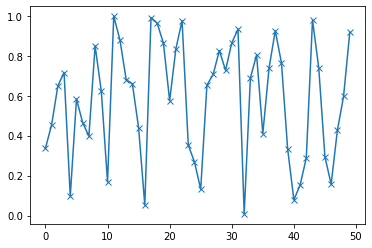

In [38]:
x = np.random.rand(50)

plt.plot(x, "x-")

In [39]:
def autocorr(x, t=1):
    """Calculates the autocorrelation between a signal {x_i} and a shifted
    version of the signal {x_(i+t)}.
    
    Built after https://stackoverflow.com/a/21863139 on 04.01.2021
    """
    if t == 0:
        return 1
    else:
        return np.corrcoef(np.array([x[:-t], x[t:]]))[0, 1]

/home/jcartus/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
autocorrelation = [autocorr(x, i) for i in range(30)]

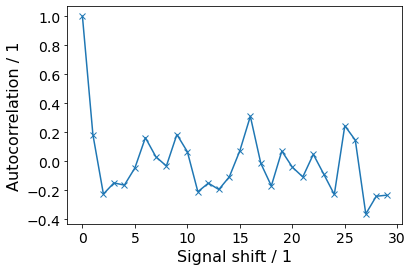

In [43]:
plt.plot(autocorrelation, "x-")

plt.ylabel("Autocorrelation / 1", fontsize=16)
plt.xlabel("Signal shift / 1", fontsize=16)

plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

# Example: Estimating Pi
[Pi](https://en.wikipedia.org/wiki/Pi) is a mathematical constant. It is defined as the ratio of a circle's circumference to its diameter, i.e. for a circle with circumference U and diameter d:
$$\pi=\frac U d $$

How can we use this to esimate pi, an irrational number? We can think in terms of surface areas! Let $r=d/2$ ne the radius of a circle, then the area is 
$$A_\mathrm{circle} = r^2\pi.$$
At the same time we know that we can also build a sqaure with the side lengths $d=2r$ in which the circle will fit perfectly and which will have the area
$$A_\mathrm{square} = d^2=4r^2.$$
Knowing both the areas we can look at their ratio:
$$\mathrm{ratio}=\frac{A_\mathrm{circle}}{A_\mathrm{square}} = \frac{r^2\pi}{r^24}=\frac{\pi}{4} $$
This ratio must stay the same for symmetry reasons when looking only at a quarter circle and a quarter of our large square, which then has only side length r.

(-1.2, 2.0)

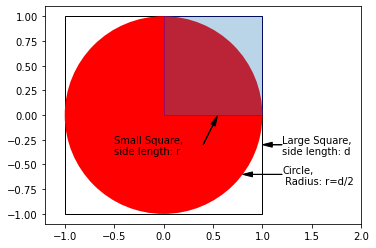

In [91]:
plt.axes()

# large sqaure (sidelength d)
r2 = plt.Rectangle([-1,-1], 2, 2, fc="none", ec="k")
plt.gca().add_patch(r2)

# circle
circle = plt.Circle((0, 0), radius=1, fc='r')
plt.gca().add_patch(circle)

# small square side length r = d/2
r1 = plt.Rectangle([0,0], 1, 1, alpha=0.3, ec="b")
plt.gca().add_patch(r1)



# add labels
plt.arrow(1.2, -0.3, -0.1, 0, head_width=0.05, head_length=0.1, fc="k")
plt.text(1.2, -0.4, "Large Square,\nside length: d")

plt.arrow(0.4, -0.3, 0.1, 0.2, head_width=0.05, head_length=0.1, fc="k")
plt.text(-0.5, -0.4, "Small Square,\nside length: r")

plt.arrow(1.2, -0.6, -0.3, 0, head_width=0.05, head_length=0.1, fc="k")
plt.text(1.2, -0.7, "Circle,\n Radius: r=d/2")



plt.axis("scaled")
plt.xlim([-1.2, 2])



### Estimating the area ratio with number of random points in there
Lets assume r=1 as is drawn above.

In [100]:
def calculate_ratio(n_points):

    # generate n_points random points in the first quadrant smaller 1, 
    # i.e. within the small square.
    # random.rand produces values between 0 and 1
    x = np.random.rand(n_points) 
    y = np.random.rand(n_points)

    # which of these is within the circle?
    r = np.sqrt(x**2 + y**2)
    is_within_circle = r <= 1

    # all points are within square, thus the ratio is
    ratio = np.sum(is_within_circle)/len(is_within_circle)

    return ratio

ratio = calculate_ratio(1000)

print(f"Points within circle: {np.sum(is_within_circle)}")
print(f"Points outise circle: {np.sum(~is_within_circle)}")
print(f"ratio circle/square: {ratio}")

Points within circle: 796
Points outise circle: 204
ratio circle/square: 0.789


/home/jcartus/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


From above we know that
$$\pi=4 \cdot \mathrm{ratio} $$

In [101]:
4 * ratio

3.156

In [102]:
np.pi

3.141592653589793

### Let's look at convergence

In [112]:
ratio = []
n_points = np.logspace(1, 8, 8)
for n in n_points:
    ratio.append(calculate_ratio(n_points=int(n)))

# convert to numpy array
ratio = np.asarray(ratio)

# calculate the abs error 
error = np.abs(ratio * 4 - np.pi)

/home/jcartus/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/jcartus/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


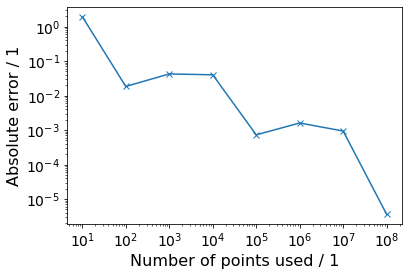

In [118]:
plt.loglog(n_points, error, "x-")

plt.xlabel("Number of points used / 1", fontsize=16)
plt.ylabel("Absolute error / 1", fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

### Exercise:
Estimate pi using [buffon's needle](https://en.wikipedia.org/wiki/Buffon%27s_needle_problem)